<a href="https://colab.research.google.com/github/yashverma165/Meachine_learning/blob/main/Decision_Tree_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classifer Implementation with Post Pruning

Notes at battom

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
df=load_iris()

In [ ]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import seaborn as sns
dataset=sns.load_dataset('iris')

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# independent and dependent Features
x=dataset.iloc[:,:-1]
y=df.target

In [ ]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Post Pruning
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
118,7.7,2.6,6.9,2.3
138,6.0,3.0,4.8,1.8
75,6.6,3.0,4.4,1.4
37,4.9,3.6,1.4,0.1


[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.7, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.7, 0.0833333333

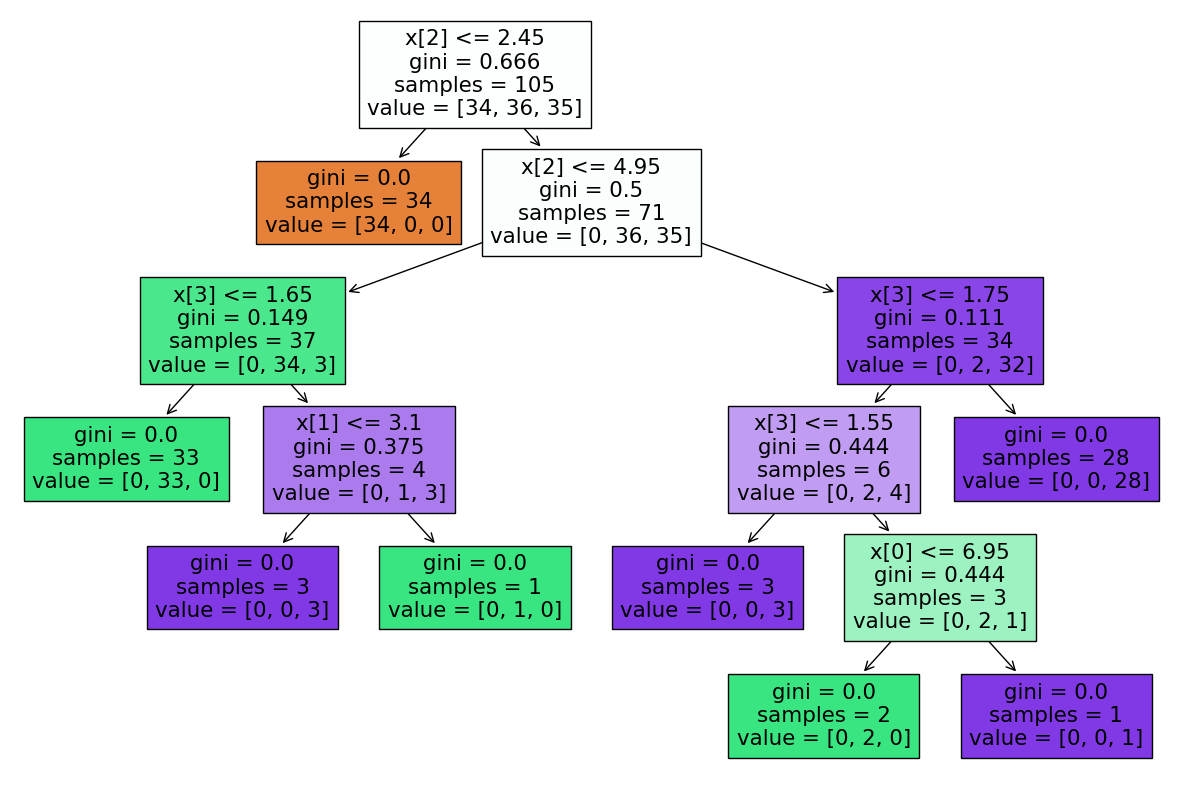

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

###Post pruning

In [ ]:
# Post Pruning
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.111\nsamples = 34\nvalue = [0, 2, 32]')]

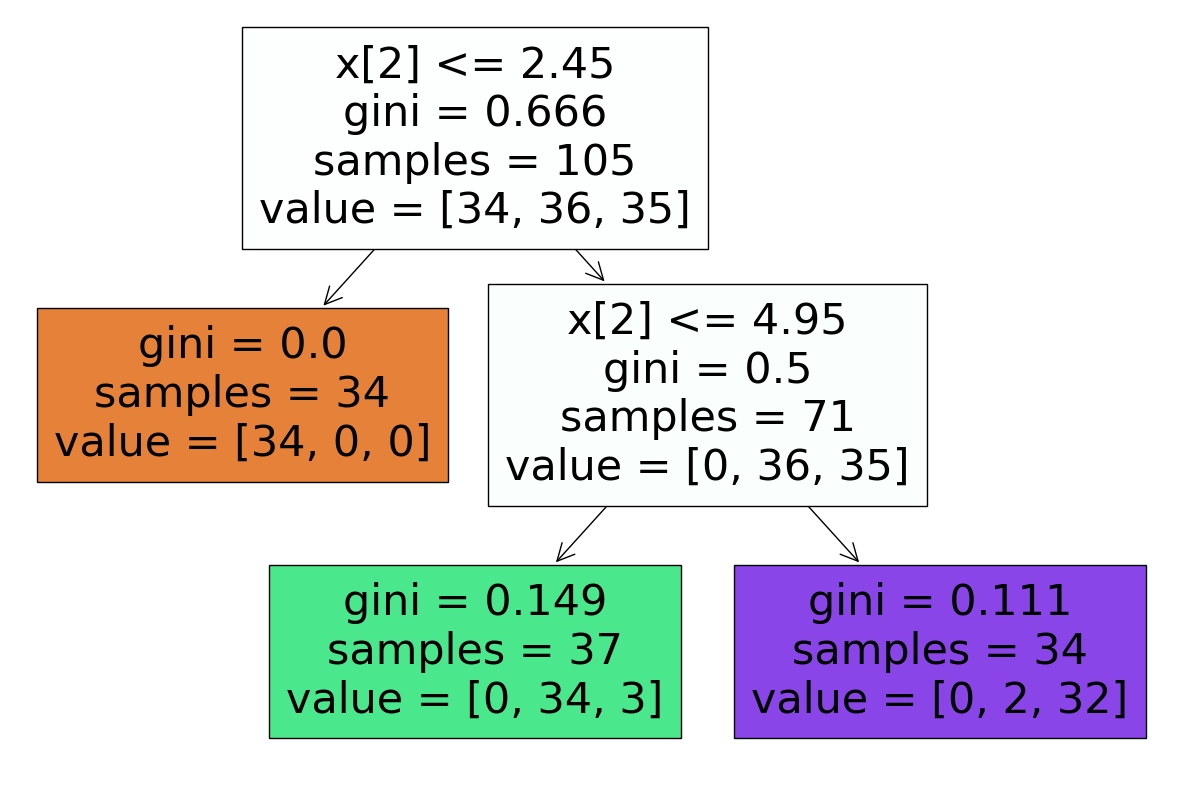

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
y_pred=treeclassifier.predict(x_test)
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
       2])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        17
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



##Assignment Example

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df2=load_breast_cancer()


In [ ]:
print(df2.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df2.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data=df2.data
target=df2.target

In [ ]:
data,target

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(data,target,random_state=42,test_size=.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [ ]:
treeclassifier.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
df2.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

[Text(0.5384615384615384, 0.9375, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.36538461538461536, 0.8125, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.2692307692307692, 0.6875, 'x[13] <= 48.7\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.19230769230769232, 0.5625, 'x[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(0.15384615384615385, 0.4375, 'x[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(0.07692307692307693, 0.3125, 'x[27] <= 0.101\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.3125, 'x[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(0.2692307692307692, 0.1875, 'x[1] <= 23.2\ngini = 

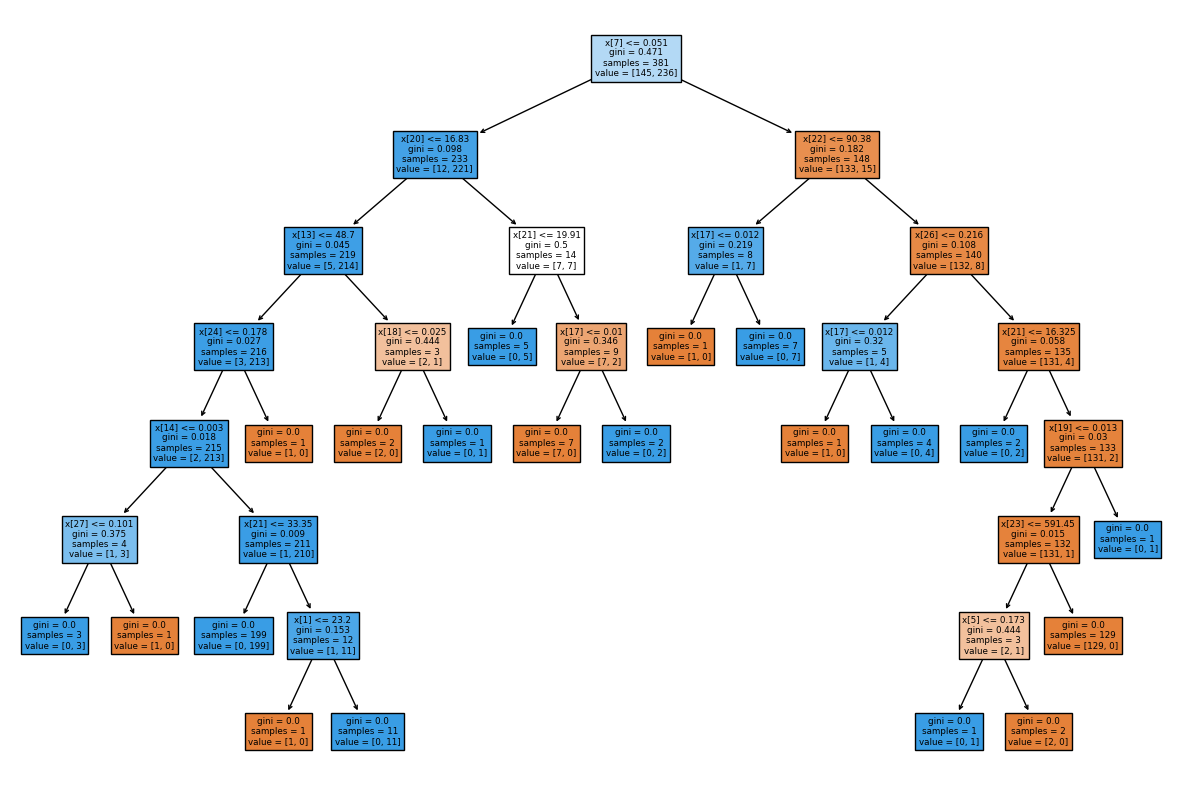

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
treeclassifier=DecisionTreeClassifier(max_depth=1)
treeclassifier.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.25, 'gini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.75, 0.25, 'gini = 0.182\nsamples = 148\nvalue = [133, 15]')]

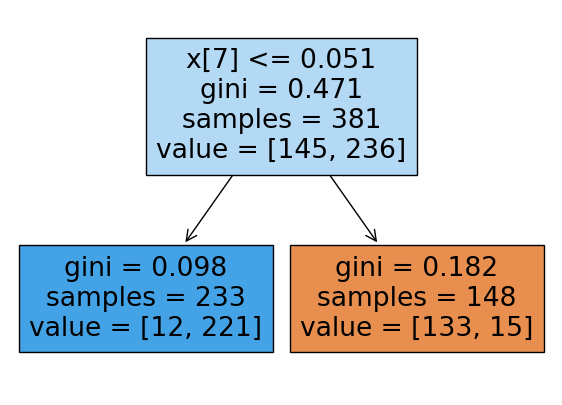

In [ ]:
plt.figure(figsize=(7,5))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
y_pred=treeclassifier.predict(x1_test)

In [ ]:
print(accuracy_score(y_pred,y1_test))
print(classification_report(y_pred,y1_test))

0.8882978723404256
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        72
           1       0.89      0.93      0.91       116

    accuracy                           0.89       188
   macro avg       0.89      0.88      0.88       188
weighted avg       0.89      0.89      0.89       188



#Decision Tree Prepruning and Hyperparamter

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameter={'criterion':['gini', 'entropy', 'log_loss'],
           'splitter':['best', 'random'],
           'max_depth':[1,2,3,4,5,6,7],
           'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clt=GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
#Train data
clt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
clt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
treeclassifier=DecisionTreeClassifier(criterion= 'entropy',
                        max_depth= 4,
                        max_features= 'sqrt',
                        splitter= 'random')

In [ ]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       splitter='random')

[Text(0.5, 0.9, 'x[2] <= 2.607\nentropy = 1.585\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 2.497\nentropy = 1.0\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.5, 0.5, 'x[2] <= 6.047\nentropy = 0.999\nsamples = 69\nvalue = [0, 36, 33]'),
 Text(0.3333333333333333, 0.3, 'x[2] <= 5.89\nentropy = 0.985\nsamples = 63\nvalue = [0, 36, 27]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.981\nsamples = 62\nvalue = [0, 36, 26]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.8333333333333334, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

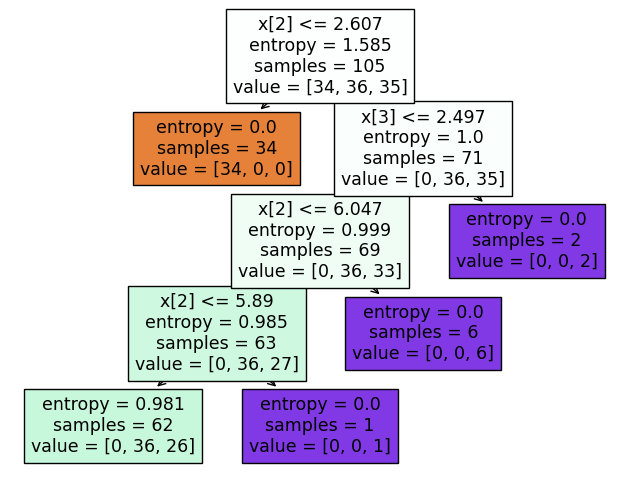

In [ ]:
plt.figure(figsize=(8,6))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
y_pred=clt.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.9111111111111111

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



##Decsion Tree
1. Decision Tree Classifier [Classification]

2. Decision tree Regressor [Regression]


Decison Tree Classifier

Two Types

1. ID3 [Iterative Dichotomizer 3] :- childs can be more than binary.

2. CART [Classification and Regression] :- Binary split Tree.

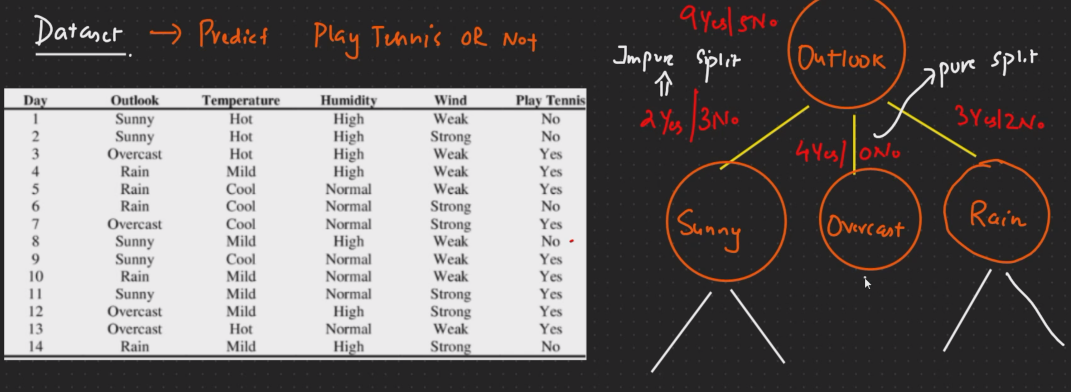

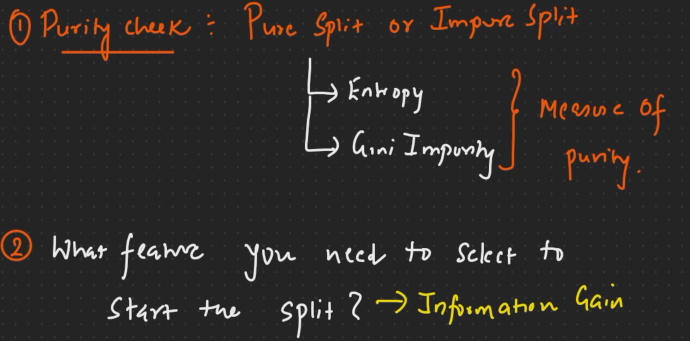

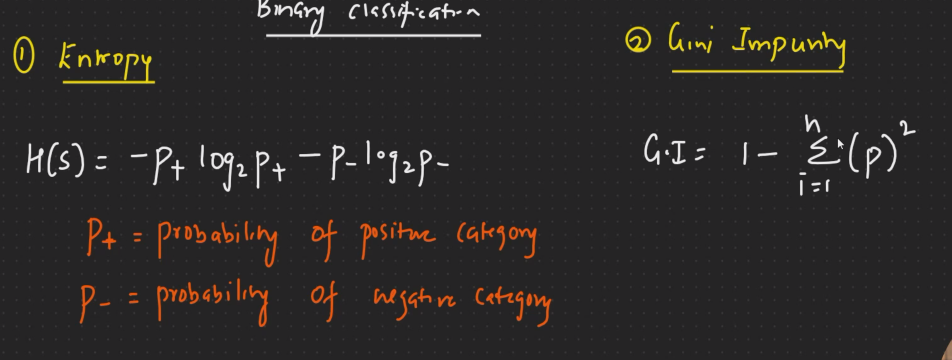

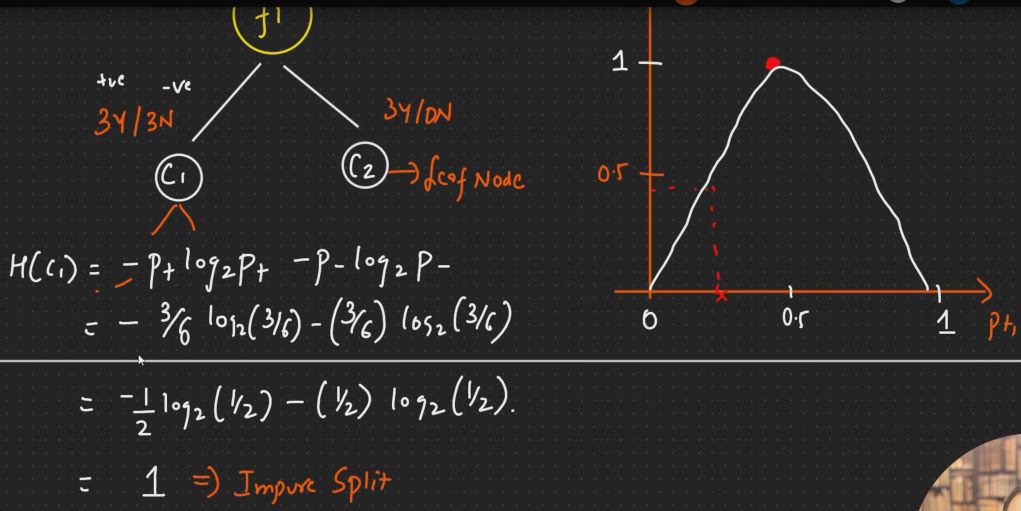

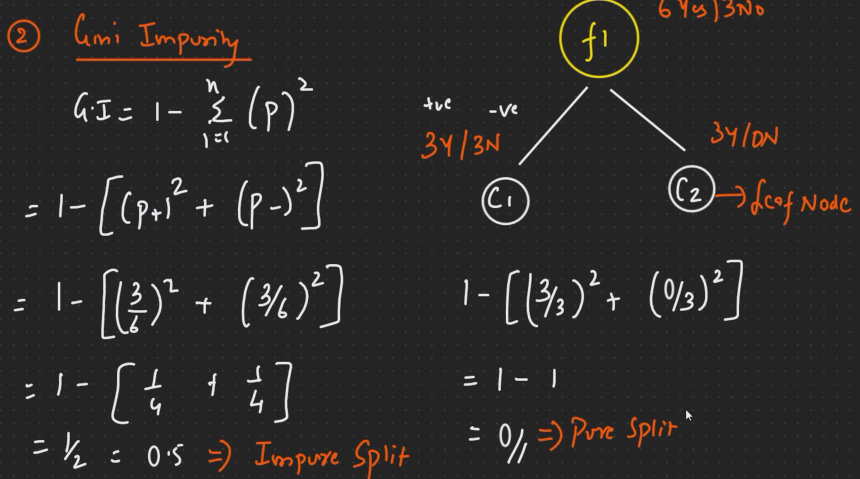

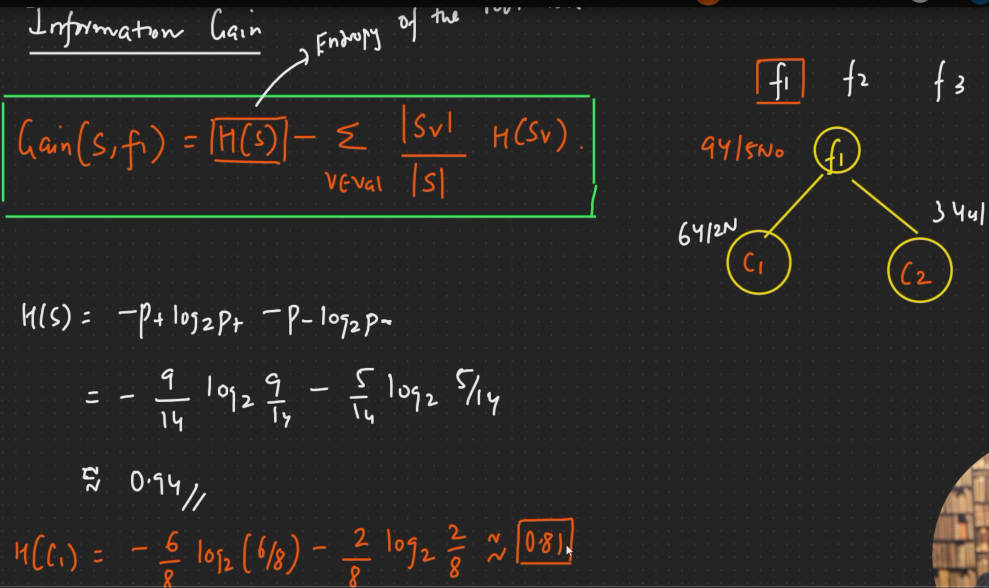

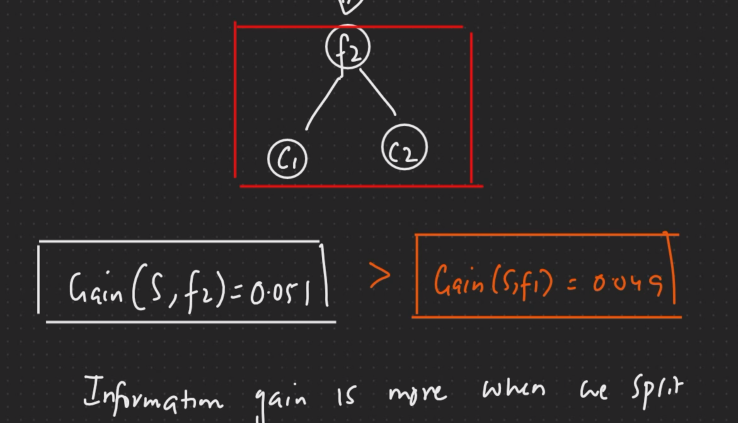